# 遗传算法
能够生存下来的往往不是最强大的物种，也不是最聪明的物种，而是最能适应环境的物种。————查尔斯.达尔文

## 案例：基于遗传算法的拼图
用若干个三角形拟合成一个图案
参考：https://blog.csdn.net/weixin_40804043/article/details/86718379

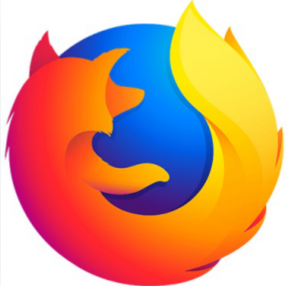

In [2]:
from IPython.display import Image
Image(filename='firefox.png', width=100)

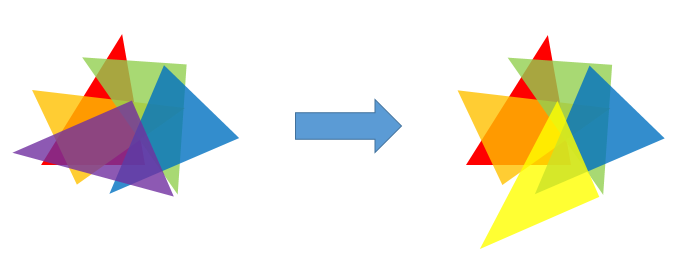

In [3]:
Image(filename='pingtu.png', width=700)

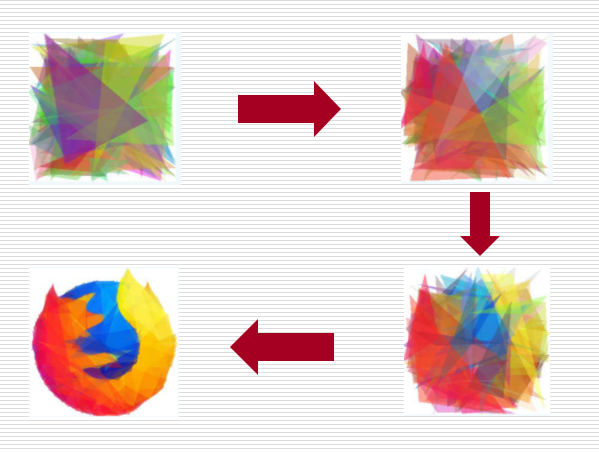

In [5]:
Image(filename='images/result.png', width=500)

### 拼图的基因
- 如果我们把128个半透明三角形组成的东西看成一个生物个体的话，它的样子是由这些三角形决定的。
- 每个三角形可以看作一个染色体，三角形的不同特征可以看作不同基因

### 随机初始化
- 随机生成一系列的坐标值、颜色值，将这些值组合成一个个随机的三角形。
- 每128个三角形组成一个初始的个体，作为遗传算法最初的父代。

### 图片的适应度值
- 对于每一个像素点，三个颜色通道分别计算当前图像A与目标图像B的差值。
- 将这个差值平方相加作为适应度函数：f=(Ra-Rb)^2+(Ga-Gb)^2+(Ba-Bb)^2

### 复制
- 将适应度高的染色体原封不动地复制给子代

### 交叉
- 对于现有的父类，可以选择直接遗传继承，也可以选择交换某些三角形进行交叉

### 变异
- 将某个父类中的部分三角形进行变异
    - 完全随机变异
    - 或在原有基础上进行稍微改变

### 判定与淘汰
- 如果子代适应度 > 亲代适应度则子代取代亲代，反之子代被淘汰

### 终止条件
- 当适应度函数小于一定阈值
- 或者循环迭代的次数超过了一定的限制

## 遗传算法流程

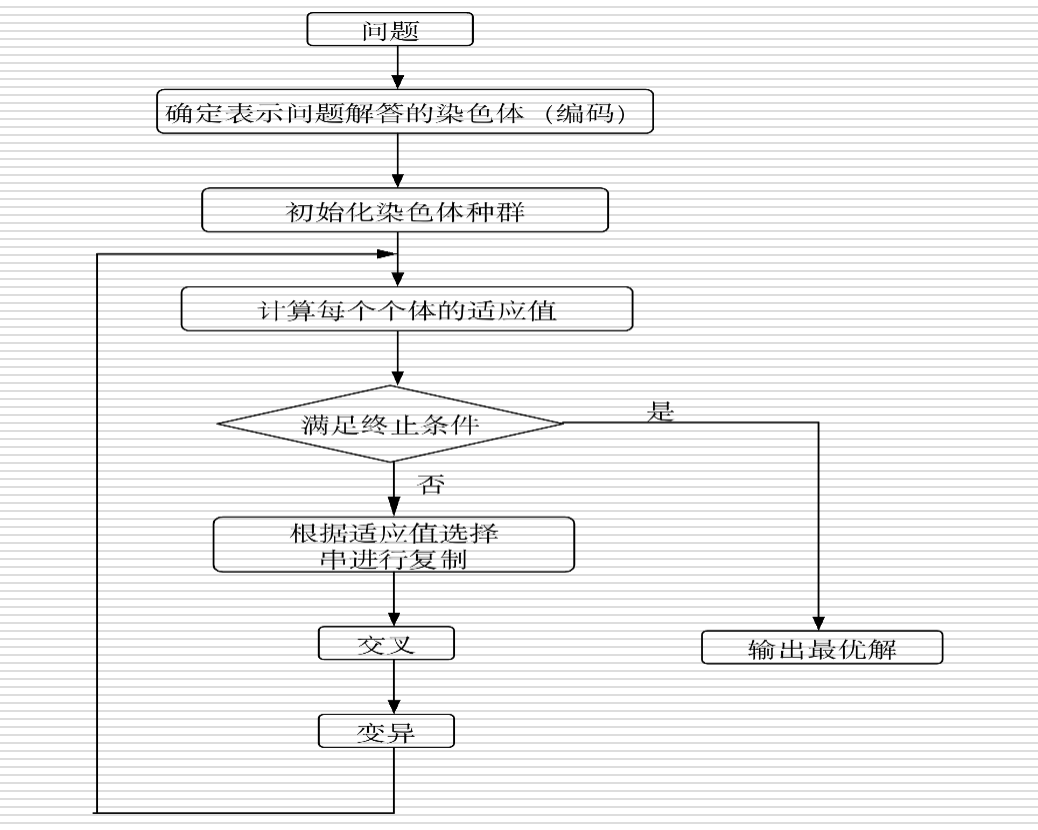

In [2]:
from IPython.display import Image
Image(filename='images/遗传算法.png', width=700)

In [15]:
!pip install minpy

  Using cached https://files.pythonhosted.org/packages/32/a1/3c8e9b25ec2bdca5f8a600b0982aa383704116211c16d8be4a25affcb24d/minpy-0.3.4.tar.gz
  Running setup.py bdist_wheel for minpy: started
  Running setup.py bdist_wheel for minpy: finished with status 'done'
  Stored in directory: C:\Users\ZhMin\AppData\Local\pip\Cache\wheels\8f\73\b5\8f72812c174366f4fd467ff29a7fb5da3ce8bf8be3b1cda35e
  Running setup.py bdist_wheel for tabulate: started
  Running setup.py bdist_wheel for tabulate: finished with status 'done'
  Stored in directory: C:\Users\ZhMin\AppData\Local\pip\Cache\wheels\9c\9b\f4\eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built minpy tabulate


In [1]:
!pip install mxnet

  Found existing installation: urllib3 1.24.1
    Uninstalling urllib3-1.24.1:
      Successfully uninstalled urllib3-1.24.1
  Found existing installation: idna 2.8
    Uninstalling idna-2.8:
      Successfully uninstalled idna-2.8
  Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0


py2neo 4.3.0 has requirement urllib3<1.25,>=1.23, but you'll have urllib3 1.22 which is incompatible.


In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from PIL import Image, ImageDraw
import os
import gc
import random as r
import minpy.numpy as np

class Color(object):
    '''
    定义颜色的类，这个类包含r,g,b,a表示颜色属性
    '''
    def __init__(self):
        self.r = r.randint(0, 255)
        self.g = r.randint(0, 255)
        self.b = r.randint(0, 255)
        self.a = r.randint(95, 115)


def mutate_or_not(rate):
    '''
    生成随机数，判断是否需要变异
    '''
    return True if rate > r.random() else False


class Triangle(object):
    '''
    定义三角形的类
    属性：
            ax,ay,bx,by,cx,cy：表示每个三角形三个顶点的坐标
            color 			 : 表示三角形的颜色
            img_t			 : 三角形绘制成的图，用于合成图片
    方法：
            mutate_from(self, parent):      从父代三角形变异
            draw_it(self, size=(256, 256)): 绘制三角形
    '''

    max_mutate_rate = 0.08 
    mid_mutate_rate = 0.3
    min_mutate_rate = 0.8


    def __init__(self, size=(255, 255)):
        self.ax = r.randint(0, size[0])
        self.ay = r.randint(0, size[1])
        self.bx = r.randint(0, size[0])
        self.by = r.randint(0, size[1])
        self.cx = r.randint(0, size[0])
        self.cy = r.randint(0, size[1])
        self.color = Color()
        self.img_t = None


    def mutate_from(self, parent):
        if mutate_or_not(self.max_mutate_rate):
            self.ax = r.randint(0, 255)
            self.ay = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.ax = min(max(0, parent.ax + r.randint(-15, 15)), 255)
            self.ay = min(max(0, parent.ay + r.randint(-15, 15)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.ax = min(max(0, parent.ax + r.randint(-3, 3)), 255)
            self.ay = min(max(0, parent.ay + r.randint(-3, 3)), 255)

        if mutate_or_not(self.max_mutate_rate):
            self.bx = r.randint(0, 255)
            self.by = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.bx = min(max(0, parent.bx + r.randint(-15, 15)), 255)
            self.by = min(max(0, parent.by + r.randint(-15, 15)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.bx = min(max(0, parent.bx + r.randint(-3, 3)), 255)
            self.by = min(max(0, parent.by + r.randint(-3, 3)), 255)

        if mutate_or_not(self.max_mutate_rate):
            self.cx = r.randint(0, 255)
            self.cy = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.cx = min(max(0, parent.cx + r.randint(-15, 15)), 255)
            self.cy = min(max(0, parent.cy + r.randint(-15, 15)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.cx = min(max(0, parent.cx + r.randint(-3, 3)), 255)
            self.cy = min(max(0, parent.cy + r.randint(-3, 3)), 255)
        # color
        if mutate_or_not(self.max_mutate_rate):
            self.color.r = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.color.r = min(max(0, parent.color.r + r.randint(-30, 30)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.color.r = min(max(0, parent.color.r + r.randint(-10, 10)), 255)

        if mutate_or_not(self.max_mutate_rate):
            self.color.g = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.color.g = min(max(0, parent.color.g + r.randint(-30, 30)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.color.g = min(max(0, parent.color.g + r.randint(-10, 10)), 255)

        if mutate_or_not(self.max_mutate_rate):
            self.color.b = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.color.b = min(max(0, parent.color.b + r.randint(-30, 30)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.color.b = min(max(0, parent.color.b + r.randint(-10, 10)), 255)
        # alpha
        if mutate_or_not(self.mid_mutate_rate):
            self.color.a = r.randint(95, 115)
        # if mutate_or_not(self.mid_mutate_rate):
        #     self.color.a = min(max(0, parent.color.a + r.randint(-30, 30)), 255)
        # if mutate_or_not(self.min_mutate_rate):
        #     self.color.a = min(max(0, parent.color.a + r.randint(-10, 10)), 255)


    def draw_it(self, size=(256, 256)):
        self.img_t = Image.new('RGBA', size)
        draw = ImageDraw.Draw(self.img_t)
        draw.polygon([(self.ax, self.ay),
                      (self.bx, self.by),
                      (self.cx, self.cy)],
                     fill=(self.color.r, self.color.g, self.color.b, self.color.a))
        return self.img_t


class Canvas(object):
    '''
    定义每一张图片的类
    属性：
            mutate_rate	 : 变异概率
            size		 : 图片大小
            target_pixels: 目标图片像素值
    方法：
            add_triangles(self, num=1)      : 在图片类中生成num个三角形
            mutate_from_parent(self, parent): 从父代图片对象进行变异
            calc_match_rate(self)			: 计算环境适应度
            draw_it(self, i)				: 保存图片
    '''


    mutate_rate = 0.01
    size = (256, 256)
    target_pixels = []


    def __init__(self):
        self.triangles = []
        self.match_rate = 0
        self.img = None


    def add_triangles(self, num=1):
        for i in range(0, num):
            triangle = Triangle()
            self.triangles.append(triangle)


    def mutate_from_parent(self, parent):
        flag = False
        for triangle in parent.triangles:
            t = triangle
            if mutate_or_not(self.mutate_rate):
                flag = True
                a = Triangle()
                a.mutate_from(t)
                self.triangles.append(a)
                continue
            self.triangles.append(t)
        if not flag:
            self.triangles.pop()
            t = parent.triangles[r.randint(0, len(parent.triangles) - 1)]
            a = Triangle()
            a.mutate_from(t)
            self.triangles.append(a)


    def calc_match_rate(self):
        if self.match_rate > 0:
            return self.match_rate
        self.match_rate = 0
        self.img = Image.new('RGBA', self.size)
        draw = ImageDraw.Draw(self.img)
        draw.polygon([(0, 0), (0, 255), (255, 255), (255, 0)], fill=(255, 255, 255, 255))
        for triangle in self.triangles:
            self.img = Image.alpha_composite(self.img, triangle.img_t or triangle.draw_it(self.size))    
        # 与下方代码功能相同，此版本便于理解但效率低
        # pixels = [self.img.getpixel((x, y)) for x in range(0, self.size[0], 2) for y in range(0, self.size[1], 2)]
        # for i in range(0, min(len(pixels), len(self.target_pixels))):
        #     delta_red   = pixels[i][0] - self.target_pixels[i][0]
        #     delta_green = pixels[i][1] - self.target_pixels[i][1]
        #     delta_blue  = pixels[i][2] - self.target_pixels[i][2]
        #     self.match_rate += delta_red   * delta_red   + \
        #                        delta_green * delta_green + \
        #                        delta_blue  * delta_blue
        arrs = [np.array(x) for x in list(self.img.split())]    # 分解为RGBA四通道
        for i in range(3):                                      # 对RGB通道三个矩阵分别与目标图片相应通道作差取平方加和评估相似度
            self.match_rate += np.sum(np.square(arrs[i]-self.target_pixels[i]))[0]

    def draw_it(self, i):
        #self.img.save(os.path.join(PATH, "%s_%d_%d_%d.png" % (PREFIX, len(self.triangles), i, self.match_rate)))
        self.img.save(os.path.join(PATH, "%d.png" % (i)))


def main():
        global LOOP, PREFIX, PATH, TARGET, TRIANGLE_NUM
        # 声明全局变量
        img = Image.open(TARGET).resize((256, 256)).convert('RGBA')
        size = (256, 256)
        Canvas.target_pixels = [np.array(x) for x in list(img.split())]
        # 生成一系列的图片作为父本，选择其中最好的一个进行遗传
        parentList = []
        for i in range(20):
            print('正在生成第%d个初代个体' % (i))
            parentList.append(Canvas())
            parentList[i].add_triangles(TRIANGLE_NUM)
            parentList[i].calc_match_rate()
        parent = sorted(parentList, key=lambda x: x.match_rate)[0]
        del parentList
        gc.collect()
        # 进入遗传算法的循环
        i = 0
        while i < 30000:
            childList = []
            # 每一代从父代中变异出10个个体
            for j in range(10):
                childList.append(Canvas())
                childList[j].mutate_from_parent(parent)
                childList[j].calc_match_rate()
            child = sorted(childList, key=lambda x: x.match_rate)[0]
            # 选择其中适应度最好的一个个体
            del childList
            gc.collect()
            parent.calc_match_rate()
            if i % LOOP == 0:
                print ('%10d parent rate %11d \t child1 rate %11d' % (i, parent.match_rate, child.match_rate))
            parent = parent if parent.match_rate < child.match_rate else child
            # 如果子代比父代更适应环境，那么子代成为新的父代
            # 否则保持原样
            child = None
            if i % LOOP == 0:
                # 每隔LOOP代保存一次图片
                parent.draw_it(i)
                #print(parent.match_rate)
                #print ('%10d parent rate %11d \t child1 rate %11d' % (i, parent.match_rate, child.match_rate))
            i += 1


'''
定义全局变量，获取待处理的图片名
'''
NAME = input('请输入原图片文件名：')
LOOP = 100
PREFIX = NAME.split('/')[-1].split('.')[0]  # 取文件名
PATH = os.path.abspath('.')  # 取当前路径
PATH = os.path.join(PATH,'results')
TARGET = NAME  # 源图片文件名
TRIANGLE_NUM = 256  # 三角形个数

if __name__ == '__main__':
    #print('开始进行遗传算法')
    main()


请输入原图片文件名：firefox.png
正在生成第0个初代个体
正在生成第1个初代个体
正在生成第2个初代个体
正在生成第3个初代个体
正在生成第4个初代个体
正在生成第5个初代个体
正在生成第6个初代个体
正在生成第7个初代个体
正在生成第8个初代个体
正在生成第9个初代个体
正在生成第10个初代个体
正在生成第11个初代个体
正在生成第12个初代个体
正在生成第13个初代个体
正在生成第14个初代个体
正在生成第15个初代个体
正在生成第16个初代个体
正在生成第17个初代个体
正在生成第18个初代个体
正在生成第19个初代个体
         0 parent rate  1726645632 	 child1 rate  1707812896
       100 parent rate  1095719392 	 child1 rate  1088359088
       200 parent rate   840006752 	 child1 rate   839052608
       300 parent rate   667360864 	 child1 rate   666530080
       400 parent rate   555982208 	 child1 rate   555747264
       500 parent rate   492024152 	 child1 rate   491791088
       600 parent rate   435830584 	 child1 rate   435565472
       700 parent rate   384918736 	 child1 rate   383314656
       800 parent rate   354747056 	 child1 rate   354815776
       900 parent rate   337055816 	 child1 rate   337055776
      1000 parent rate   295765312 	 child1 rate   294657560
      1100 parent rate   273531768 	 child1 rate   273368

     13000 parent rate    73753384 	 child1 rate    73753376
     13100 parent rate    73581302 	 child1 rate    73584480
     13200 parent rate    73216826 	 child1 rate    73261640
     13300 parent rate    73125784 	 child1 rate    73132574
     13400 parent rate    73006880 	 child1 rate    73013640
     13500 parent rate    72813516 	 child1 rate    72812880
     13600 parent rate    72746246 	 child1 rate    72764260
     13700 parent rate    72652424 	 child1 rate    72630570
     13800 parent rate    72484816 	 child1 rate    72689854
     13900 parent rate    72419032 	 child1 rate    72485290
     14000 parent rate    72351404 	 child1 rate    72369044
     14100 parent rate    72119766 	 child1 rate    72166706
     14200 parent rate    71972620 	 child1 rate    71979780
     14300 parent rate    71790040 	 child1 rate    71809040
     14400 parent rate    71670150 	 child1 rate    71778750
     14500 parent rate    71555126 	 child1 rate    71785118
     14600 parent rate  

## 总结
通过不断地繁殖和变异，淘汰掉那些与图案相似度不高的个体，这就是遗传算法